In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [2]:
#import the data
traindata=pd.read_csv('SalaryData_Train(1).csv')
testdata=pd.read_csv('SalaryData_Test(1).csv')

In [3]:
testdata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
traindata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# lets us check the null values
traindata.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
encod=LabelEncoder()
cats=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
for i in range(len(cats)):
    traindata[cats[i]]=encod.fit_transform(traindata[cats[i]])
    testdata[cats[i]]=encod.fit_transform(testdata[cats[i]])

In [7]:
traindata['Salary']=encod.fit_transform(traindata['Salary'])
testdata['Salary']=encod.fit_transform(testdata['Salary'])

In [8]:
traindata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [9]:
#lets see the data
traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
workclass,30161.0,2.199330,0.953940,0.0,2.0,2.0,2.0,6.0
education,30161.0,10.333610,3.812260,0.0,9.0,11.0,12.0,15.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
maritalstatus,30161.0,2.580087,1.498018,0.0,2.0,2.0,4.0,6.0
occupation,30161.0,5.959849,4.029633,0.0,2.0,6.0,9.0,13.0
relationship,30161.0,1.418322,1.601361,0.0,0.0,1.0,3.0,5.0
race,30161.0,3.678592,0.834721,0.0,4.0,4.0,4.0,4.0
sex,30161.0,0.675707,0.468118,0.0,0.0,1.0,1.0,1.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0


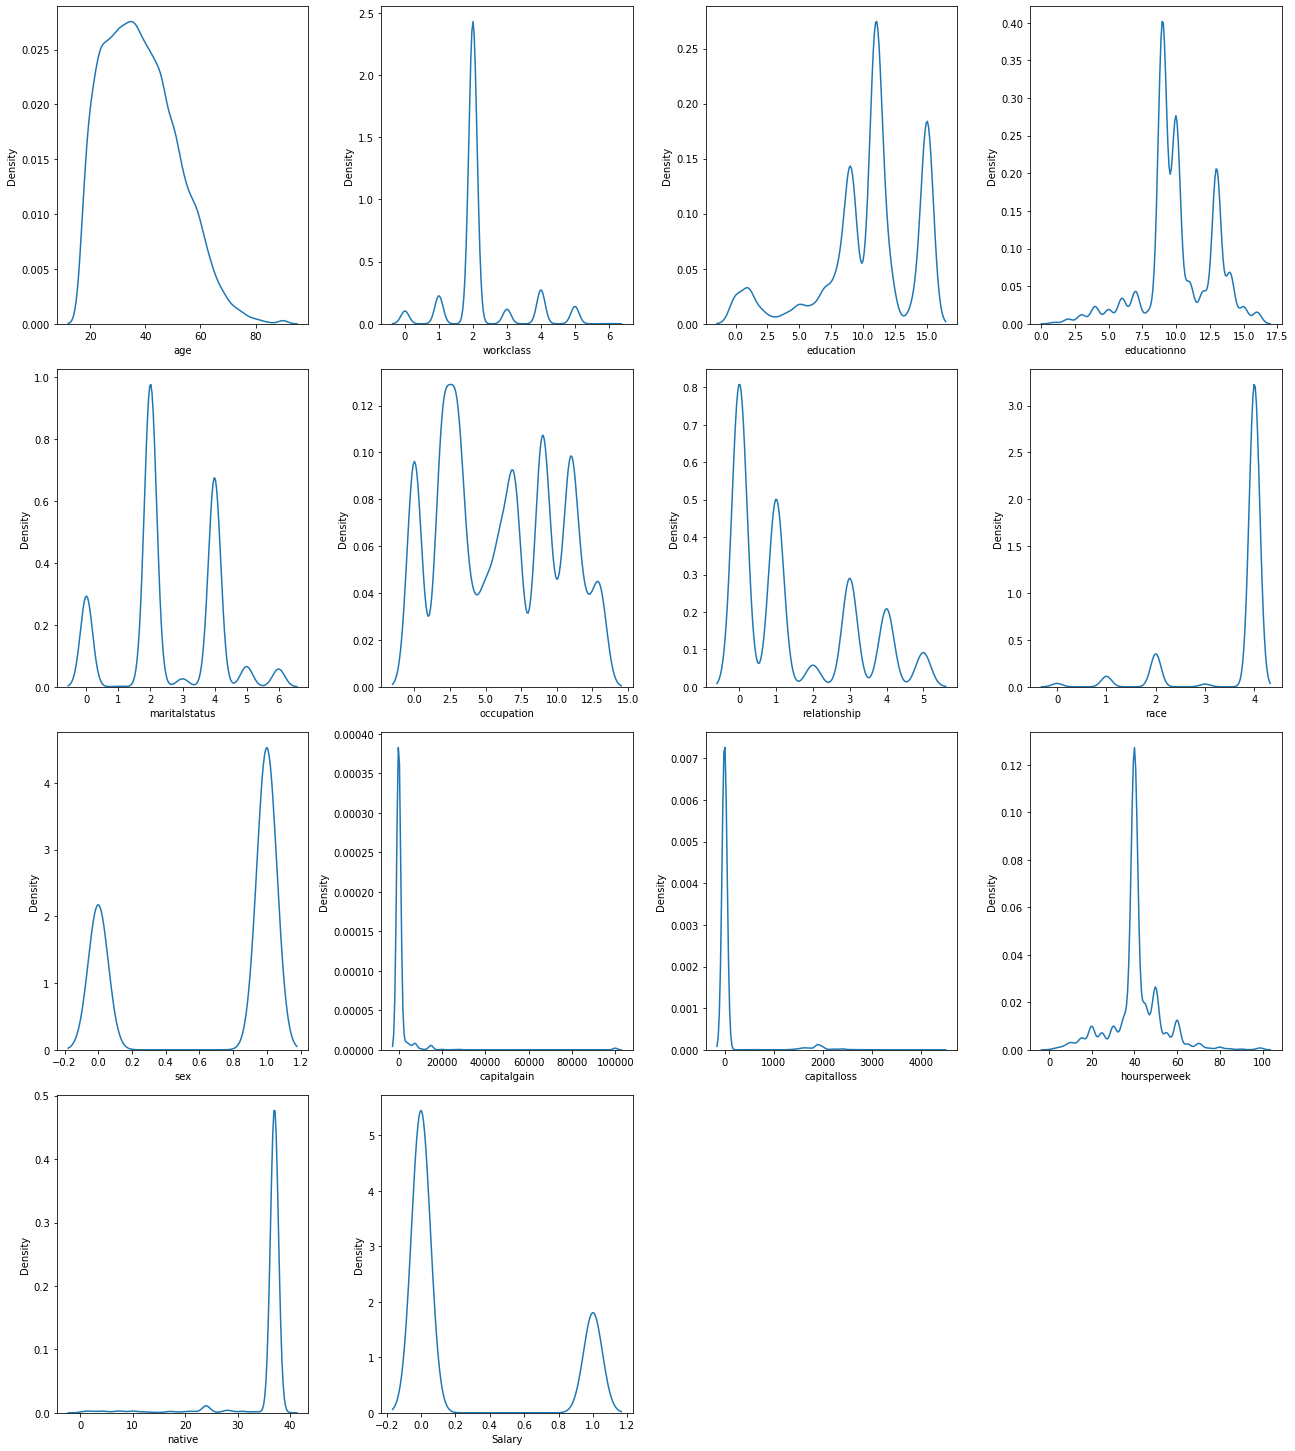

In [10]:
plt.figure(figsize=(18,40))
for i,age in enumerate(traindata.select_dtypes(exclude='object').columns.tolist(),1):
    plt.subplot(8,4,i)
    sns.kdeplot(traindata[age])
plt.tight_layout() 
plt.show()
#sns.kdeplot(traindata['capitalloss'])

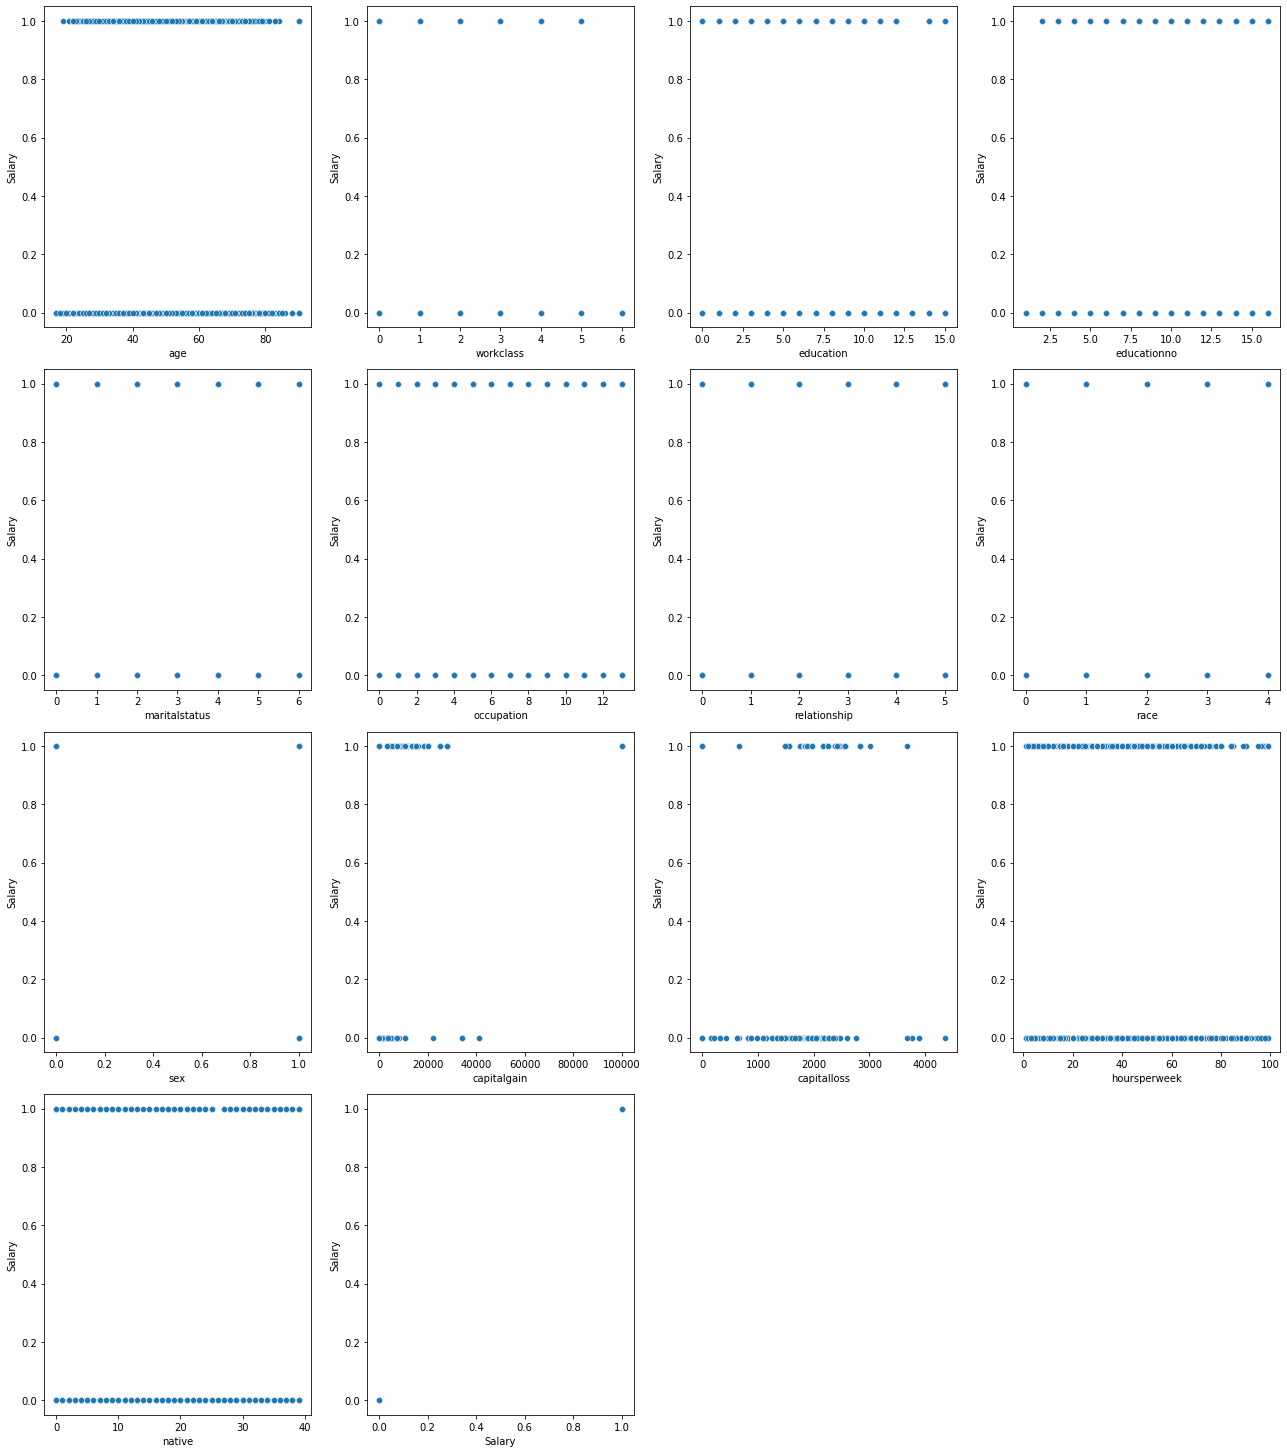

In [11]:
plt.figure(figsize=(18,40))
for i,age in enumerate(traindata.select_dtypes(exclude='object').columns.tolist(),1):
    plt.subplot(8,4,i)
    sns.scatterplot(x=traindata[age],y=traindata['Salary'],data=traindata)
plt.tight_layout() 
plt.show()

## __3 - SVM__ 

In [12]:
col=traindata.columns

In [13]:
x_train = traindata[col[0:12]]
y_train = traindata[col[12]]
x_test = testdata[col[0:12]]
y_test = testdata[col[12]]

In [14]:
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,25,2,1,7,4,6,3,2,1,0,0,40
1,38,2,11,9,2,4,0,4,1,0,0,50
2,28,1,7,12,2,10,0,4,1,0,0,40
3,44,2,15,10,2,6,0,2,1,7688,0,40
4,34,2,0,6,4,7,1,4,1,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40
15056,39,2,9,13,0,9,1,4,0,0,0,36
15057,38,2,9,13,2,9,0,4,1,0,0,50
15058,44,2,9,13,0,0,3,1,1,5455,0,40


In [15]:
norm=StandardScaler()
x_train=norm.fit_transform(x_train)
x_test=norm.fit_transform(x_test)

# Linear Kernal

In [22]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9155378486055777


## Poly

In [24]:
model_linear = SVC(kernel = "poly")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9194555112881806


# RBF

In [25]:
model_linear = SVC(kernel = "rbf")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9196547144754316


# Sigmoid

In [26]:
model_linear = SVC(kernel = "sigmoid")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8875830013280213


# Conclusion

## All the kernals are giving better accuracy but Poly is bit more